In [ ]:
%load_ext autoreload
%autoreload 2

import os

import corner
import h5py
import numpy as np
import scipy
import scipy.stats
import ultraplot as uplt
import yaml
from matplotlib import pyplot as plt


### Results from Model

In [ ]:
fnames = [
    "../../data/N_gamma_alpha_v2_statistical.hdf5",
    "../../data/N_gamma_alpha_v2_statistical-occupancy.hdf5",
    "../../data/N_gamma_alpha_v2_statistical-neighbor.hdf5",
    "../../data/N_gamma_alpha_v2_statistical-neighbor-occupancy.hdf5",
]

keys = [
    os.path.basename(fname).replace(".hdf5", "").split("_")[-1]
    for fname in fnames
]


with open("rfc_versions/fit_stats.yml") as f:
    fit_stats = yaml.load(f, Loader=yaml.SafeLoader)


fit_data = {}
for num_bins in [9, 10]:
    fit_data[num_bins] = {}
    for w in [0.1, 0.2]:
        fit_data[num_bins][w] = {}
        wval = f"{w:.1f}".replace(".", "p")

        with h5py.File(
            f"rfc_versions/des_y6_nz_data_imsim_v2_num_bins{num_bins}_w{wval}.h5", "r"
        ) as fp:
            for key in keys:
                fit_data[num_bins][w][key] = {}
                fit_data[num_bins][w][key]["m"] = fp[f"{key}/m"][()]
                fit_data[num_bins][w][key]["dz"] = fp[f"{key}/dz"][()]
                fit_data[num_bins][w][key]["nz"] = fp[f"{key}/nz"][()]


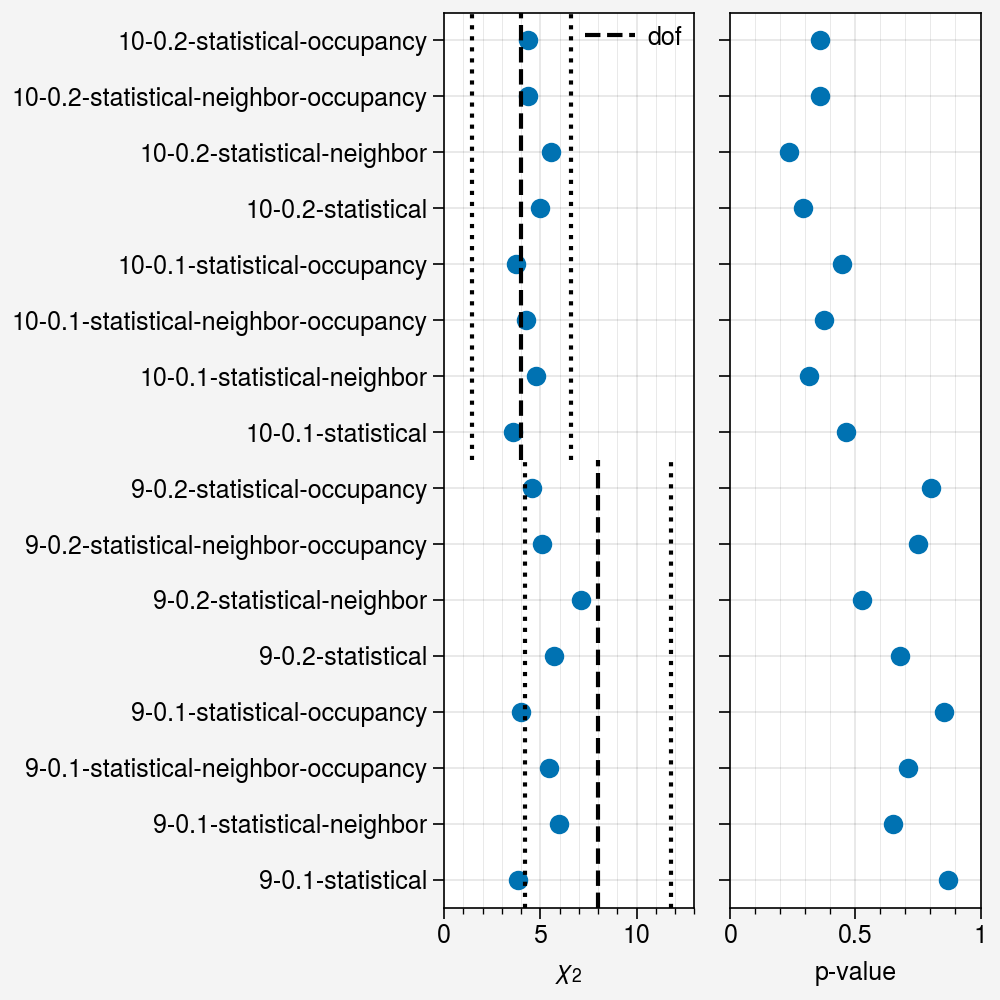

In [130]:
fig, axs = uplt.subplots(figsize=(5, 5), ncols=2, nrows=1, sharey=True, sharex=0)

chi2 = []
dof = []
pval = []
names = []
for num_bins in [9, 10]:
    for w in [0.1, 0.2]:
        for key in fit_stats[num_bins][w]:
            names.append(f"{num_bins}-{w}-{key}")
            chi2.append(fit_stats[num_bins][w][key]["chi2"])
            dof.append(fit_stats[num_bins][w][key]["dof"])
            pval.append(fit_stats[num_bins][w][key]["p_value"])

loc = np.arange(len(names))
axs[0, 0].plot(chi2, loc, "o")
axs[0, 0].format(
    xlabel=r"$\chi_2$",
    yticks=loc,
    yticklabels=names,
    xlim=[0, 13],
    xgridminor=True,
)
axs[0, 0].vlines(8, -0.5, len(names) // 2 - 1 + 0.5, color="k", linestyle="--", label="dof")
axs[0, 0].vlines(4, -0.5 + len(names) // 2, len(names) - 1 + 0.5, color="k", linestyle="--")

lev = 0.68
lowlev = (1.0 - lev) / 2
highlev = 1.0 - lowlev
for val in [lowlev, highlev]:
    axs[0, 0].vlines(
        scipy.stats.distributions.chi2.ppf(val, 8),
        -0.5, len(names) // 2 - 1 + 0.5,
        color="k", linestyle=":",
    )
    axs[0, 0].vlines(
        scipy.stats.distributions.chi2.ppf(val, 4),
        -0.5 + len(names) // 2, len(names) - 1 + 0.5,
        color="k", linestyle=":"
    )
axs[0, 0].legend(loc="ur", frameon=False)

axs[0, 1].plot(pval, loc, "o")
axs[0, 1].format(
    xlabel="p-value",
    yticks=loc,
    yticklabels=names,
    xlim=[0, 1],
    xgridminor=True,
)

fig.savefig("chi2_pval.png", dpi=300)

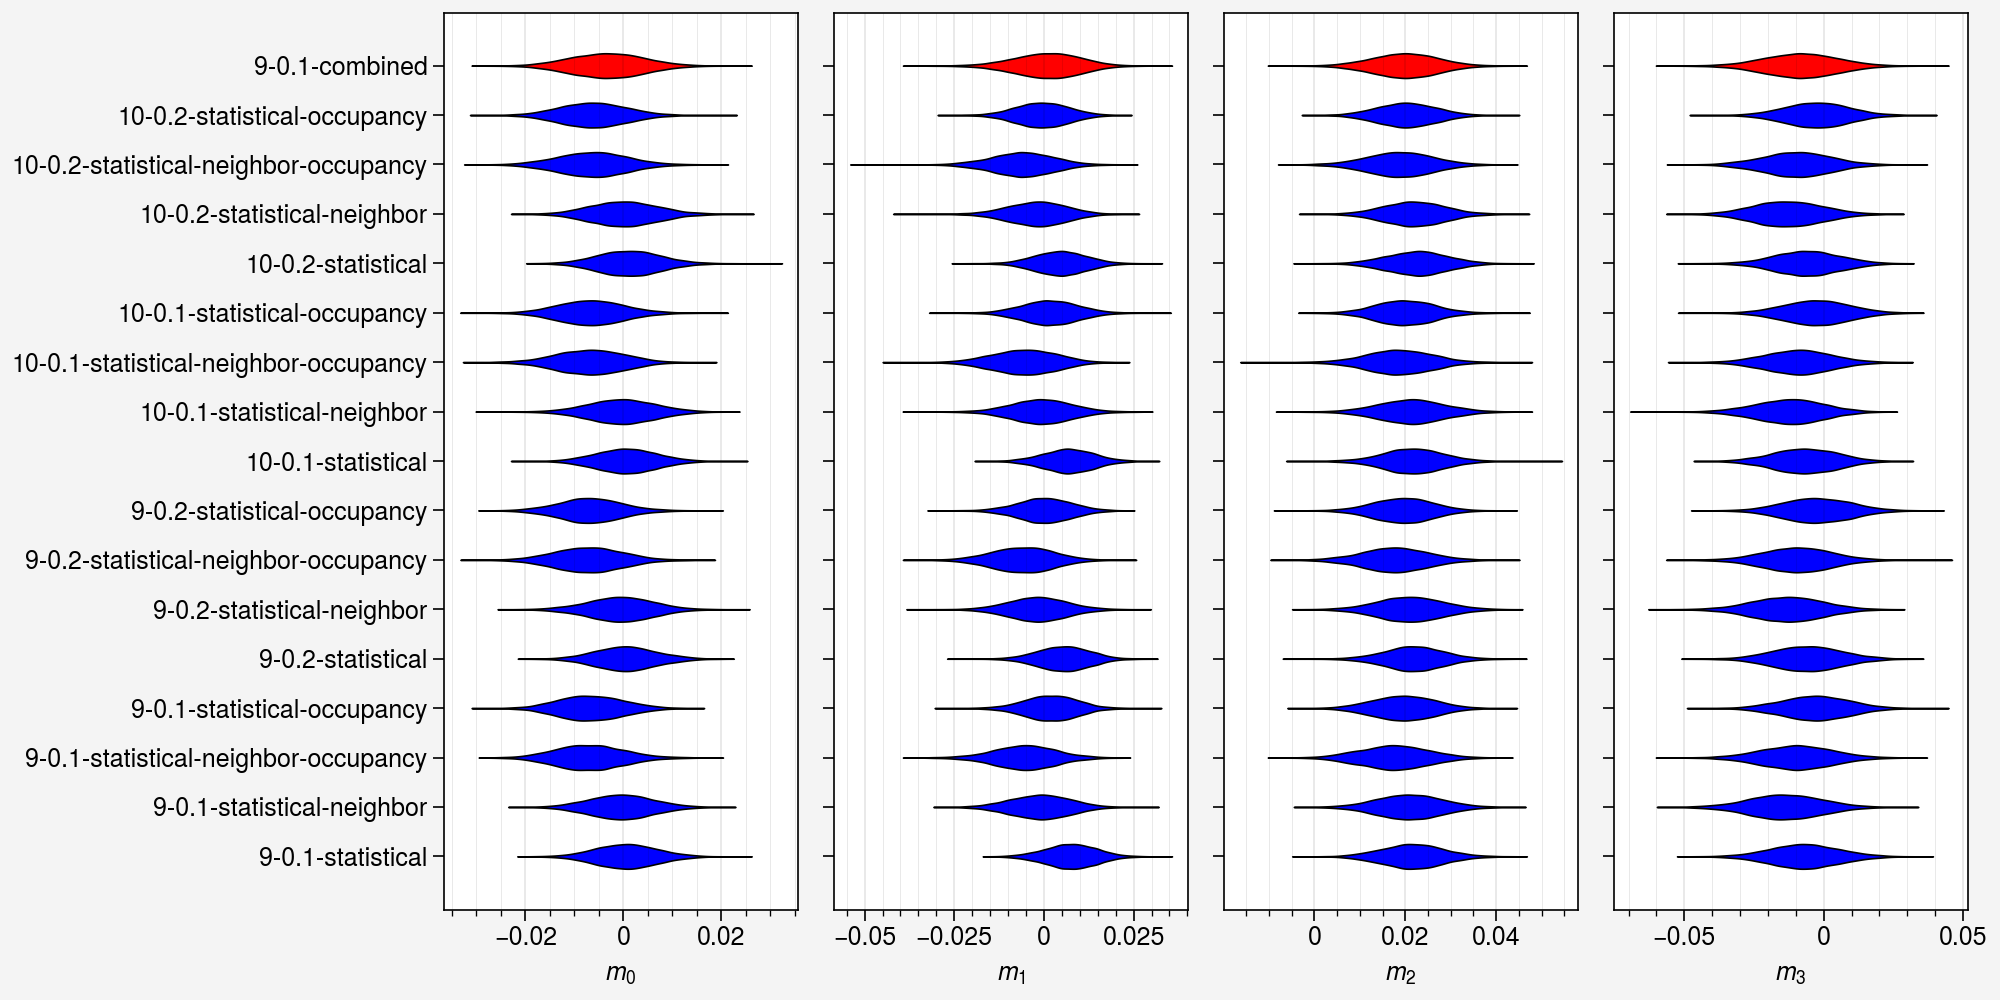

In [131]:
fig, axs = uplt.subplots(figsize=(10, 5), nrows=1, ncols=4, sharey=4, sharex=0)

loc = -1

names = []
for num_bins in [9, 10]:
    for w in [0.1, 0.2]:
        for key in fit_stats[num_bins][w]:
            for mind in range(4):
                axs[0, mind].violinh(
                    loc,
                    fit_data[num_bins][w][key]["m"][:, mind],
                    fillcolor="blue",
                    points=500,
                )
            loc += 1
            names.append(f"{num_bins}-{w}-{key}")

num_bins = 9
w = 0.1
total = np.concatenate(
    [
        fit_data[num_bins][w][key]["m"]
        for key in fit_data[num_bins][w]
    ],
    axis=0,
)
for mind in range(4):
    axs[0, mind].violinh(
        loc,
        total[:, mind],
        fillcolor="red",
        points=500,
    )
names.append("9-0.1-combined")
loc += 1

axs[0, 0].format(
    yticks=range(-1, loc),
    yticklabels=names,
)
for mind in range(4):
    axs[0, mind].format(
        xlabel=f"$m_{mind}$",
        ygrid=False,
        xgridminor=True,
    )

fig.savefig("m_models.png", dpi=300)

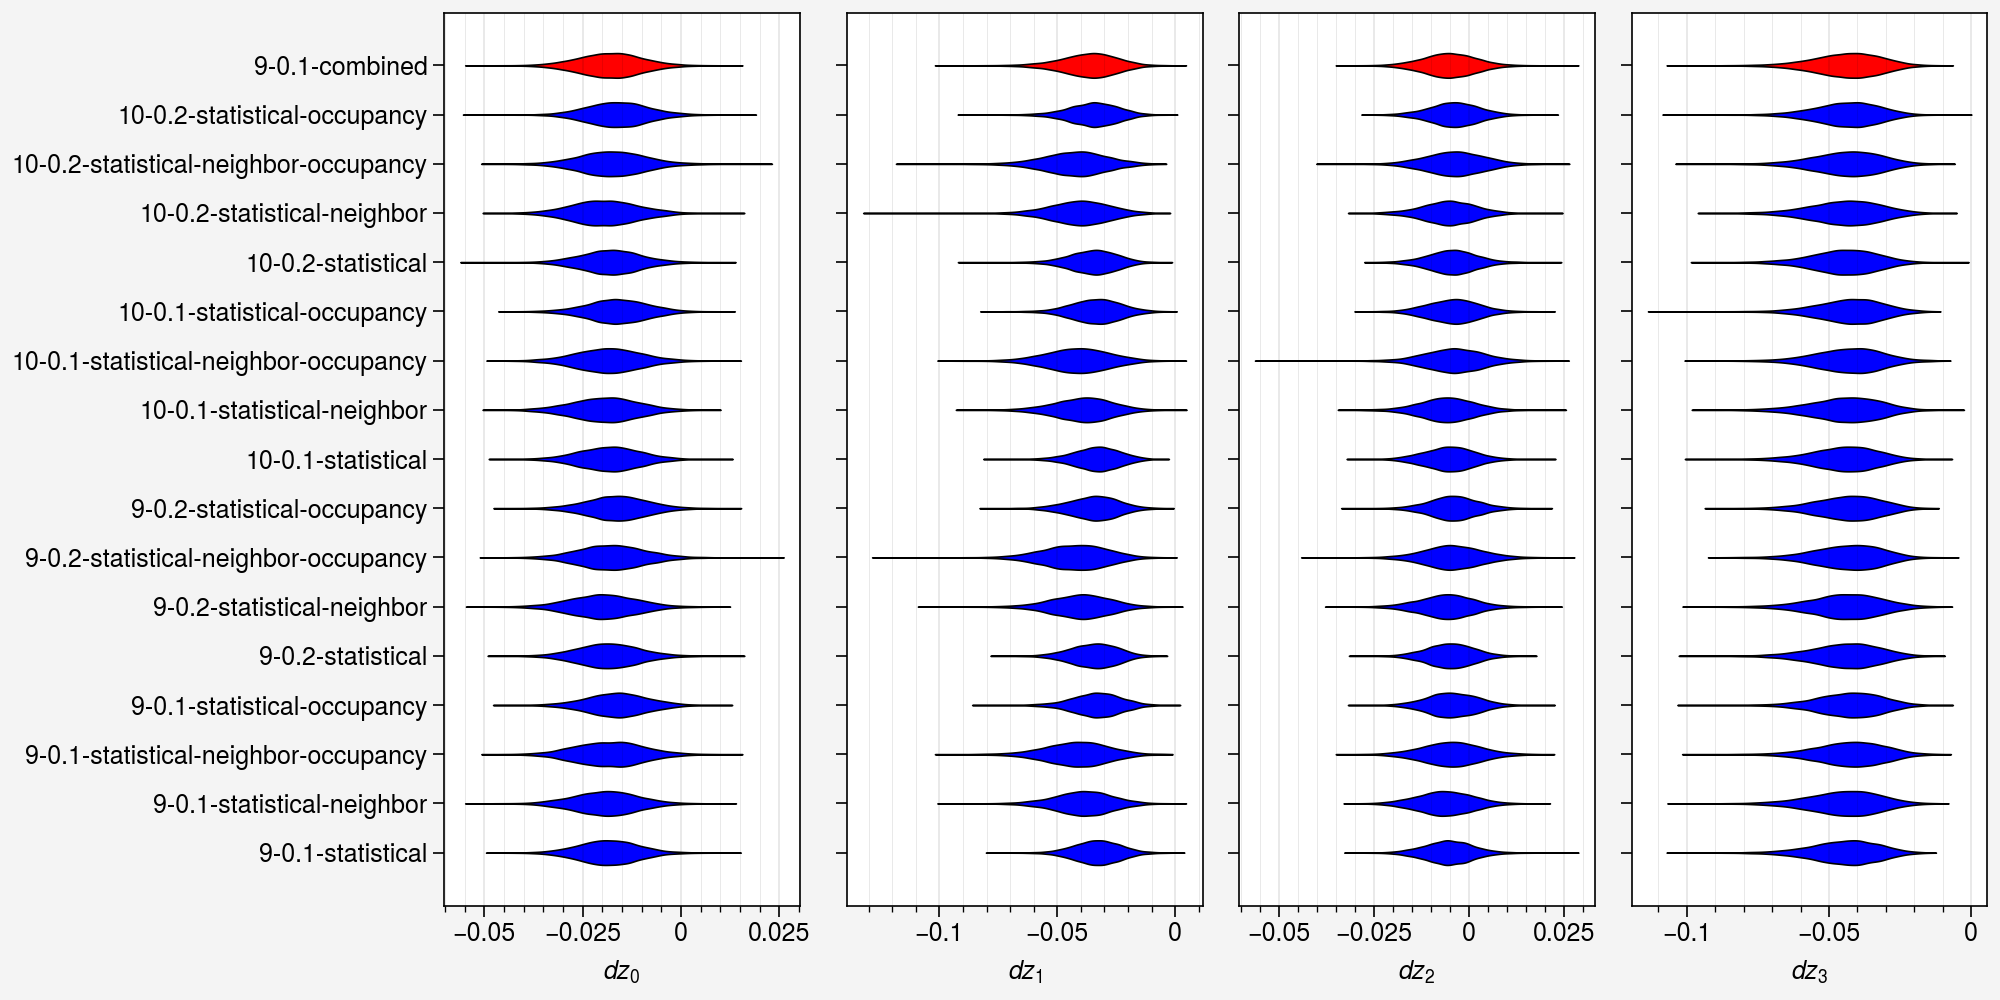

In [132]:
fig, axs = uplt.subplots(figsize=(10, 5), nrows=1, ncols=4, sharey=4, sharex=0)

loc = -1

names = []
for num_bins in [9, 10]:
    for w in [0.1, 0.2]:
        for key in fit_stats[num_bins][w]:
            for mind in range(4):
                axs[0, mind].violinh(
                    loc,
                    fit_data[num_bins][w][key]["dz"][:, mind],
                    fillcolor="blue",
                    points=500,
                )
            loc += 1
            names.append(f"{num_bins}-{w}-{key}")

num_bins = 9
w = 0.1
total = np.concatenate(
    [
        fit_data[num_bins][w][key]["dz"]
        for key in fit_data[num_bins][w]
    ],
    axis=0,
)
for mind in range(4):
    axs[0, mind].violinh(
        loc,
        total[:, mind],
        fillcolor="red",
        points=500,
    )
names.append("9-0.1-combined")
loc += 1

axs[0, 0].format(
    yticks=range(-1, loc),
    yticklabels=names,
)
for mind in range(4):
    axs[0, mind].format(
        xlabel=f"$dz_{mind}$",
        ygrid=False,
        xgridminor=True,
    )

fig.savefig("dz_models.png", dpi=300)

In [79]:
num_bins = 9
w = 0.1
all_mvals = np.concatenate(
    [
        fit_data[num_bins][w][key]["m"]
        for key in fit_data[num_bins][w]
    ],
    axis=0,
)
all_dzvals = np.concatenate(
    [
        fit_data[num_bins][w][key]["dz"]
        for key in fit_data[num_bins][w]
    ],
    axis=0,
)

m_mn = [np.mean(all_mvals[:, i]) for i in range(4)]
m_sd = [np.std(all_mvals[:, i]) for i in range(4)]

dz_mn = [np.mean(all_dzvals[:, i]) for i in range(4)]
dz_sd = [np.std(all_dzvals[:, i]) for i in range(4)]

print("|--------------------------------------------|")
print("| bin | m [10^-3, 3sigma] | dz               |")
print("|--------------------------------------------|")
for i in range(4):
    print(
        "| %d   | %+5.1f +/- %-5.1f   | %+0.3f +/- %0.3f |" % (
            i, m_mn[i]/1e-3, m_sd[i]/1e-3 * 3, dz_mn[i], dz_sd[i]
        )
    )
print("|--------------------------------------------|")

|--------------------------------------------|
| bin | m [10^-3, 3sigma] | dz               |
|--------------------------------------------|
| 0   |  -3.4 +/- 22.3    | -0.018 +/- 0.008 |
| 1   |  +0.7 +/- 27.7    | -0.037 +/- 0.012 |
| 2   | +19.8 +/- 21.8    | -0.005 +/- 0.007 |
| 3   |  -8.4 +/- 39.5    | -0.044 +/- 0.012 |
|--------------------------------------------|


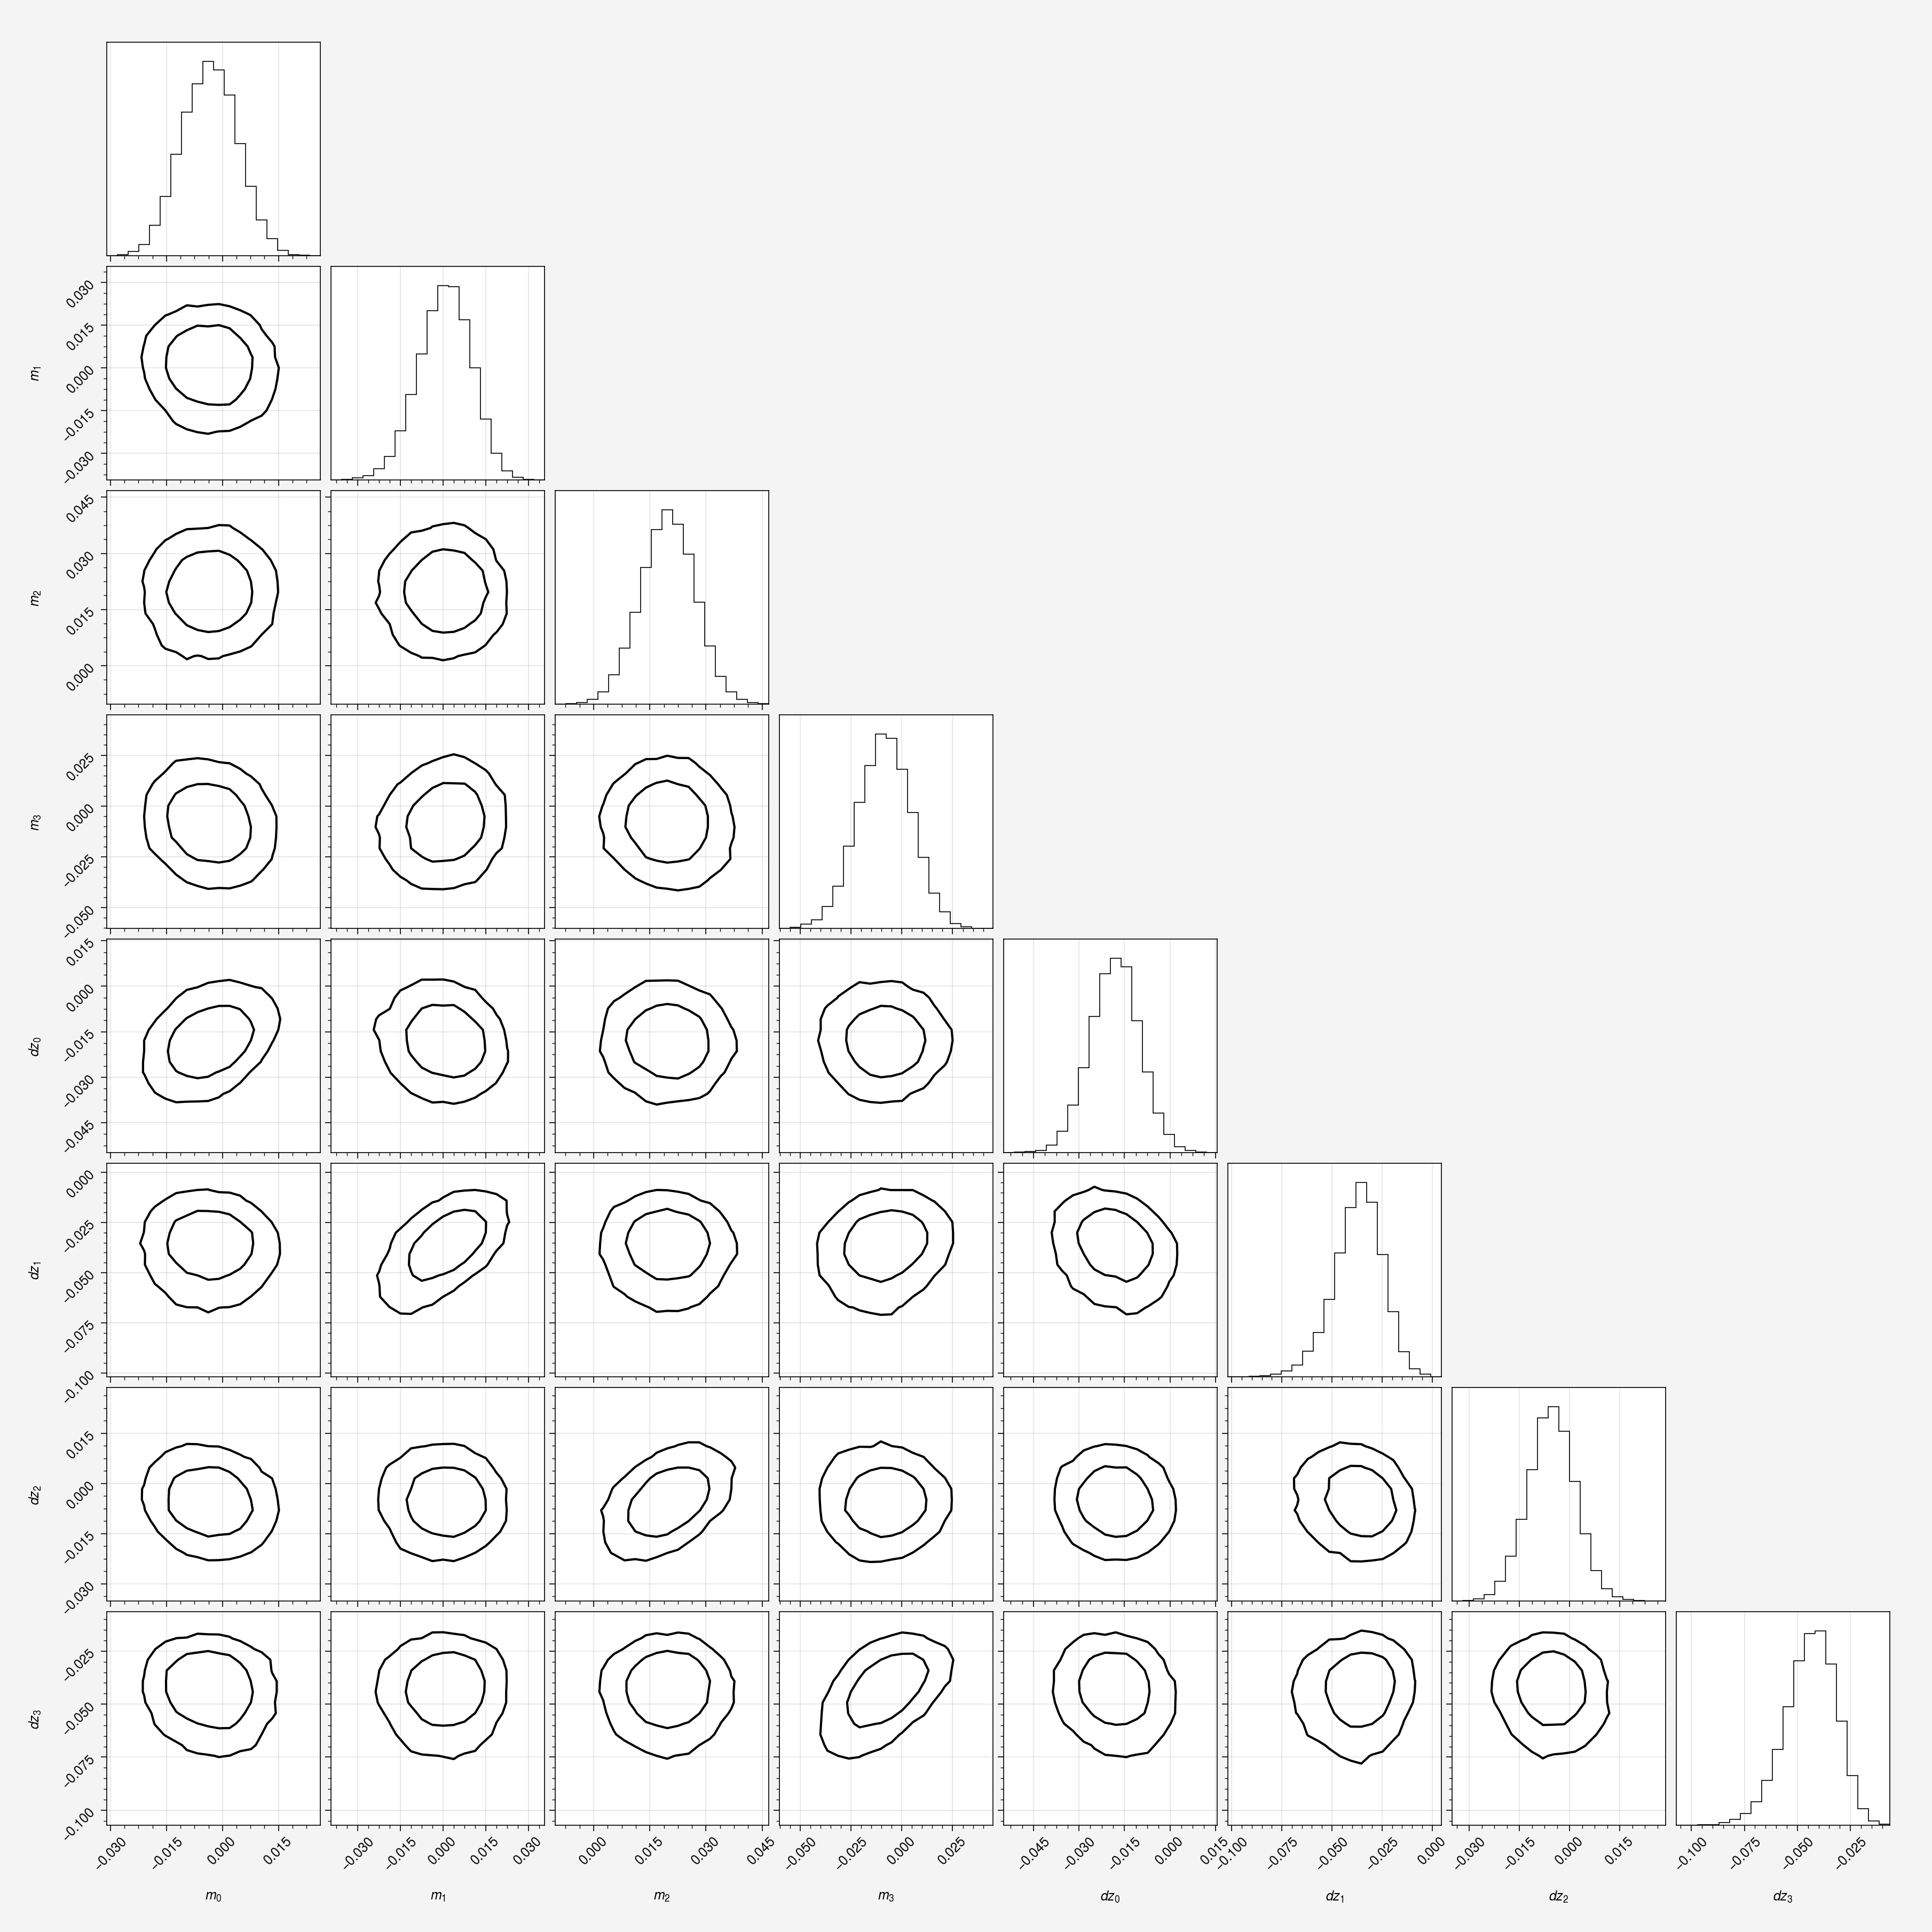

In [133]:
import corner

num_bins = 9
w = 0.1

all_mvals = np.concatenate(
    [
        fit_data[num_bins][w][key]["m"]
        for key in fit_data[num_bins][w]
    ],
    axis=0,
)

all_dzvals = np.concatenate(
    [
        fit_data[num_bins][w][key]["dz"]
        for key in fit_data[num_bins][w]
    ],
    axis=0,
)

total = np.concatenate(
    [
        all_mvals,
        all_dzvals,
    ],
    axis=1,
)
kwargs = {"alpha": 0.25}

fig = corner.corner(
    total,
    plot_datapoints=False,
    plot_density=False,
    labels=["$m_%d$" % i for i in range(4)] + ["$dz_%d$" % i for i in range(4)],
    levels=(0.68, 0.95),
    **kwargs
);
fig.savefig("corner_mdz.png", dpi=300)

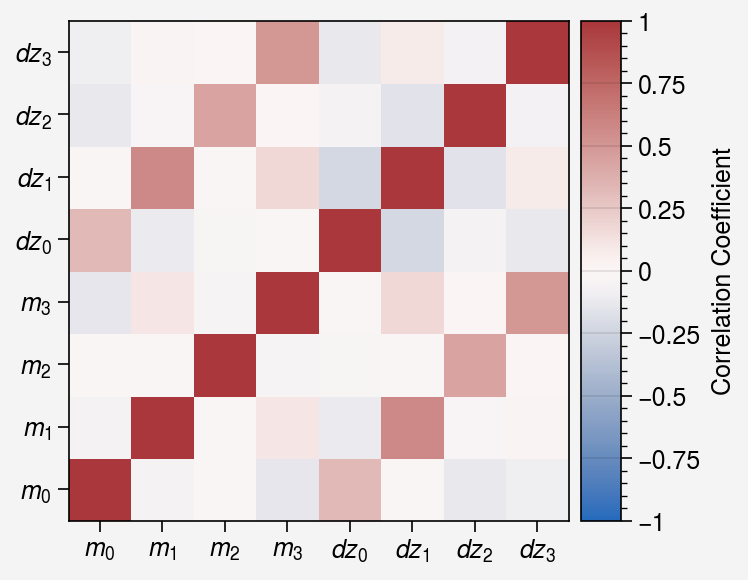

In [134]:
corr = np.corrcoef(total.T)

fig, axs = uplt.subplots()

cols = [f"$m_{i}$" for i in range(4)] + [f"$dz_{i}$" for i in range(4)]

m = axs.pcolormesh(corr, vmin=-1, vmax=1, cmap="vlag", discrete=False)
axs.colorbar(m, label="Correlation Coefficient")
axs.format(grid=False)
axs.format(
    xticks=range(8),
    yticks=range(8),
    xticklabels=cols,
    yticklabels=cols,
)

fig.savefig("corr_mdz.png", dpi=300)

### Results From Modes

In [ ]:
data = np.load("rfc_versions/des_y6_wz_blending_corrected_info.npz")
total = np.concatenate([data["m"], data["u"]], axis=1)
cov = np.cov(total.T)
corr = np.corrcoef(total.T)
mn = np.mean(total, axis=0)

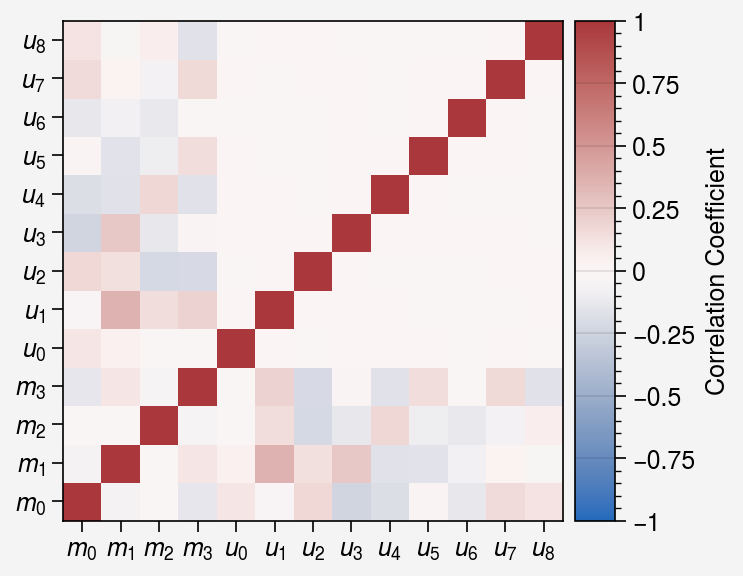

In [138]:
cols = [f"$m_{i}$" for i in range(4)] + [f"$u_{i}$" for i in range(9)]

fig, axs = uplt.subplots()

m = axs.pcolormesh(corr, vmin=-1, vmax=1, cmap="vlag", discrete=False)
axs.colorbar(m, label="Correlation Coefficient")
axs.format(grid=False, xticks=range(13), yticks=range(13), xticklabels=cols, yticklabels=cols)

fig.savefig("corr_mu.png", dpi=300)

In [139]:
total_gauss = scipy.stats.multivariate_normal(mean=mn, cov=cov).rvs(size=total.shape[0])

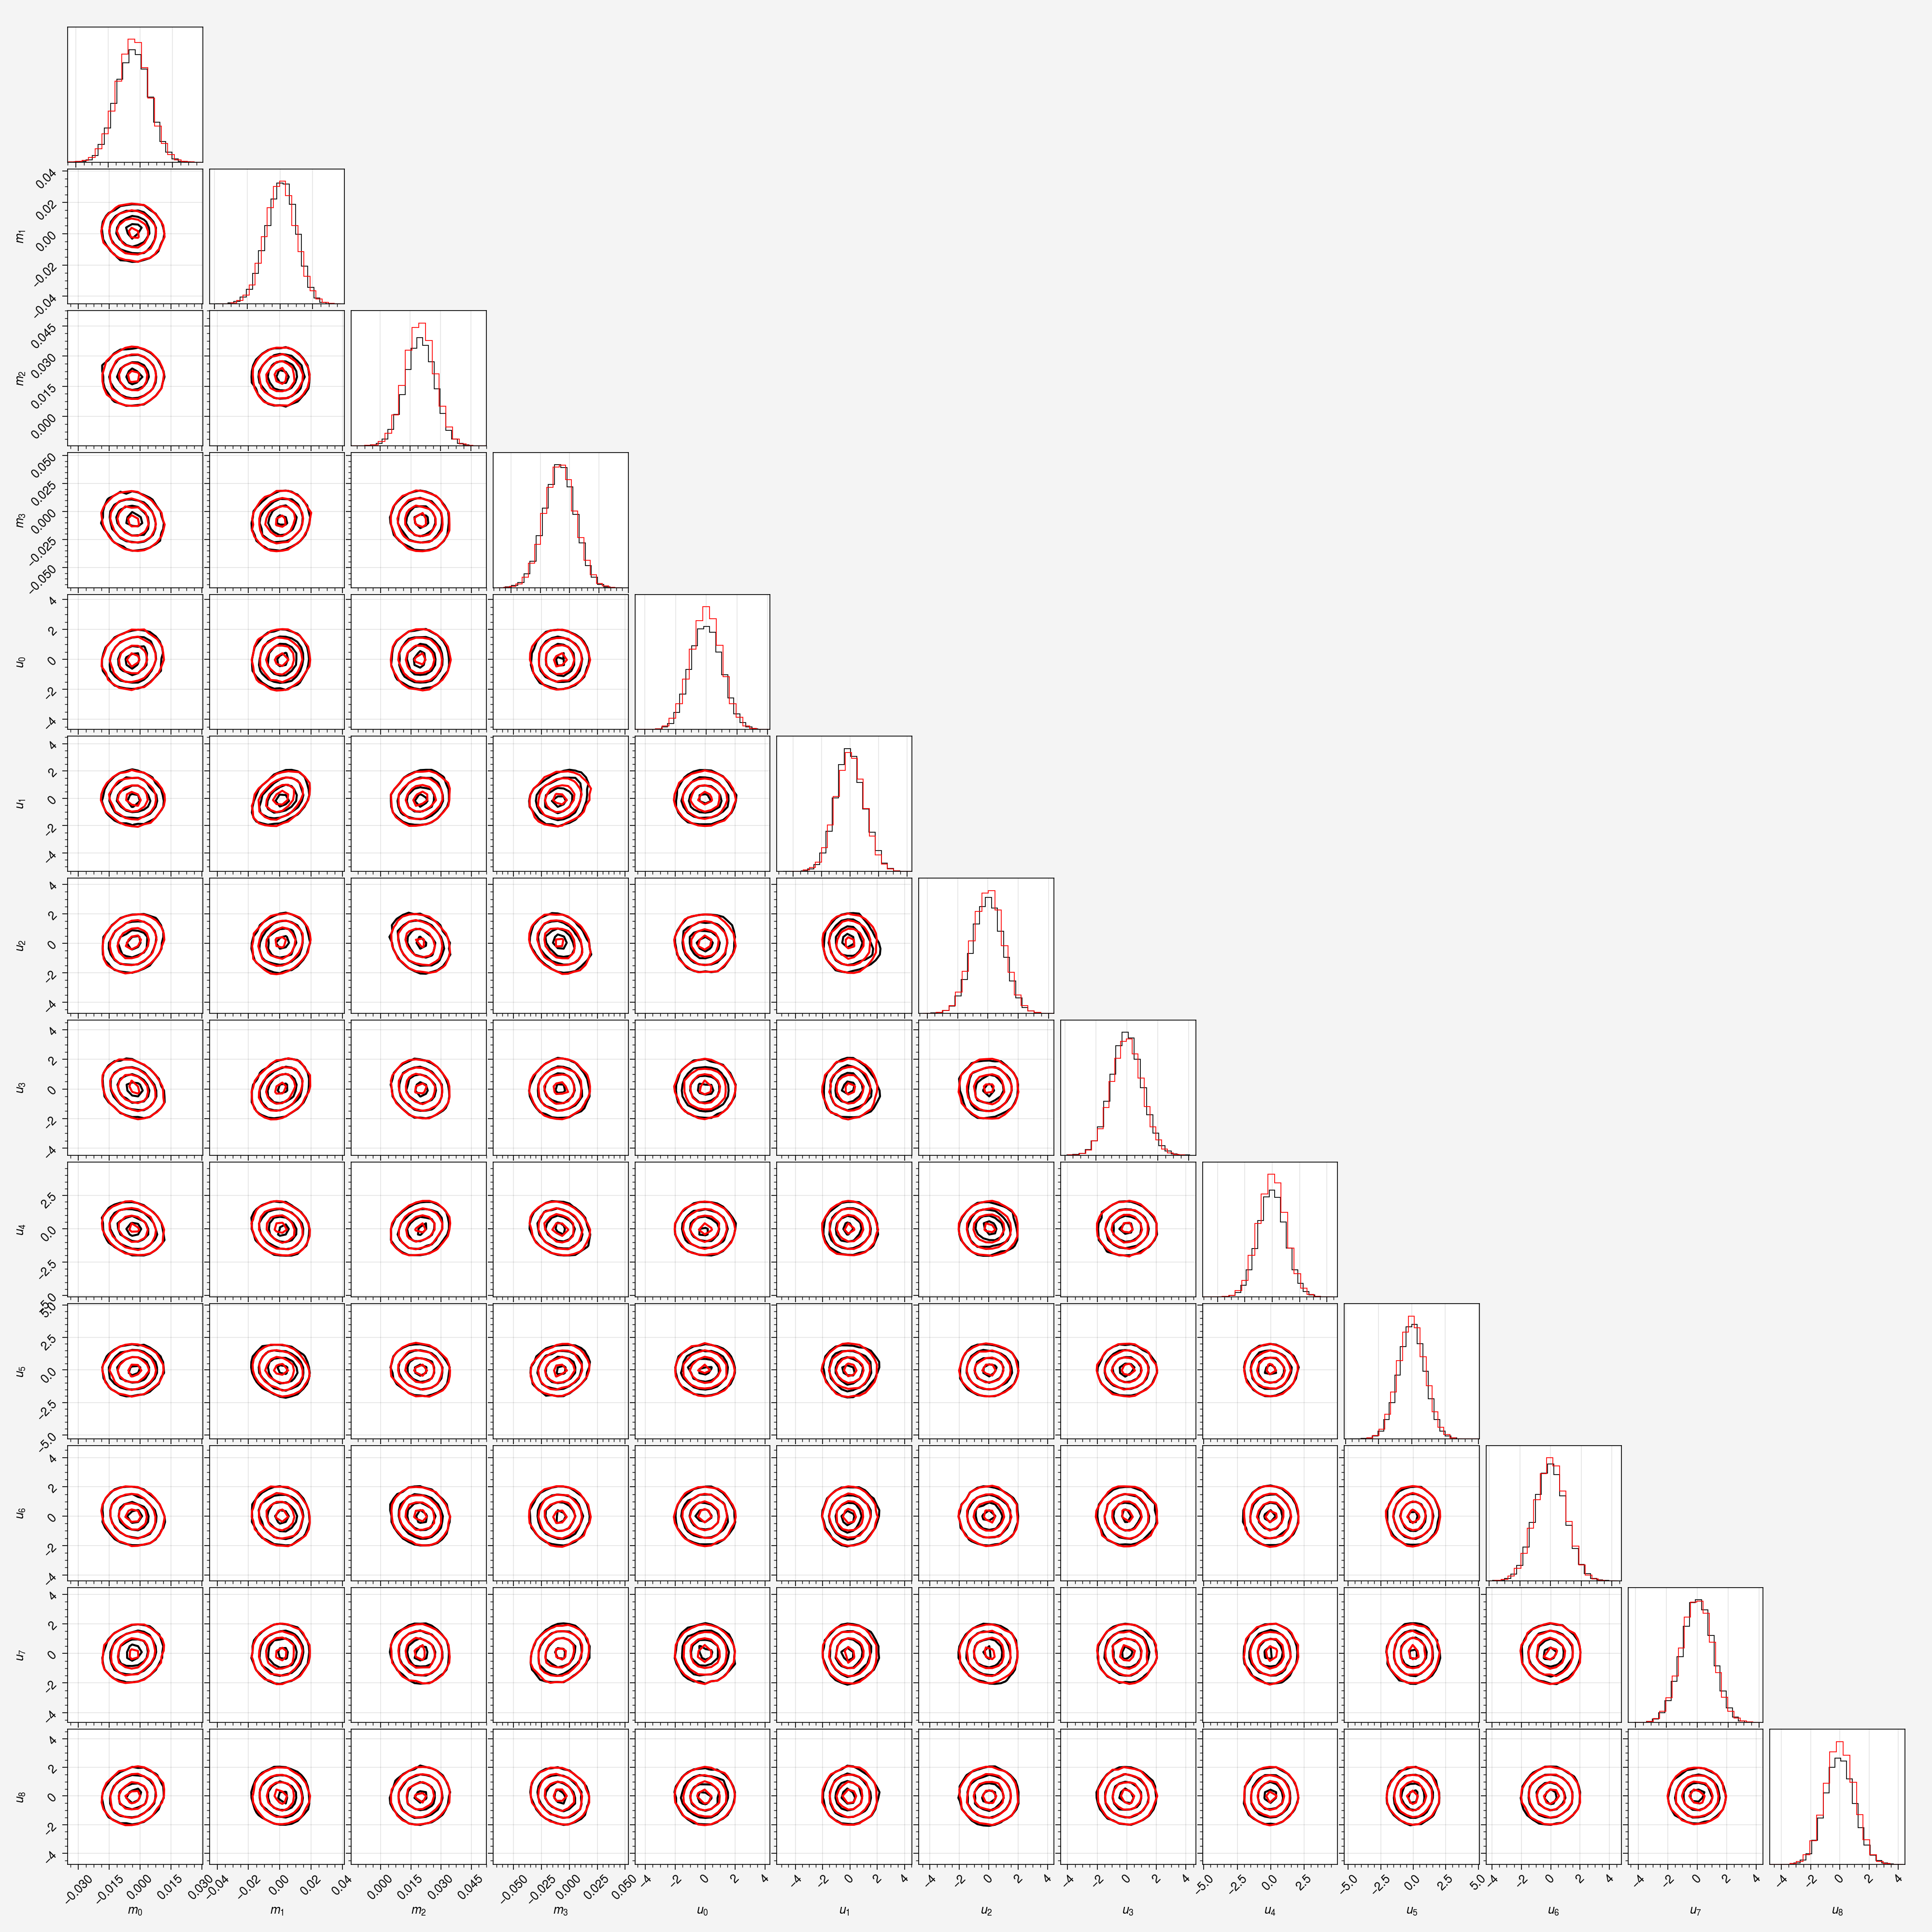

In [140]:
kwargs = {"alpha": 0.25}

fig, axs = plt.subplots(nrows=13, ncols=13, figsize=(20, 20))

corner.corner(
    total,
    fig=fig,
    plot_datapoints=False,
    plot_density=False,
    labels=cols,
)

fig = corner.corner(
    total_gauss,
    fig=fig,
    color="red",
    contourf_kwargs=kwargs,
    data_kwargs=kwargs,
    plot_datapoints=False,
    plot_density=False,
);

fig.savefig("corner_mu.png", dpi=300)

In [ ]:
print(mn)

In [ ]:
print(cov)